In [4]:
import pandas as pd
import duckdb


def load_results(res_list):
    df_list = []
    for f in res_list:
        df = pd.read_csv(f)
        df_list.append(df)
        # drop_first_row = df.iloc[1:]
        # df_list.append(drop_first_row)
    df = pd.concat(df_list)

    sql = """
        SELECT 
            ((max(qid)+1)/3)::integer as qid, 
            category, 
            time_span,
            filter_value,
            avg(execution_time) as avg_execution_time
        FROM df
        GROUP BY category, time_span, filter_value
        ORDER BY max(qid)
        """
    df_avg = duckdb.query(sql).to_df()
    return df_avg

In [5]:
import glob
result_list = glob.glob("proposed_findtime_result_*.csv")
df_proposed = load_results(result_list)
df_proposed

vanilla_list = glob.glob("vanilla_findtime_result_*.csv")
df_vanilla = load_results(vanilla_list)
df_vanilla

,qid,category,time_span,filter_value,avg_execution_time
0,2,changing_time,1.0,310,17.635878
1,4,changing_time,2.5,310,19.801829
2,6,changing_time,5.0,310,16.798077
3,8,changing_time,10.0,310,41.403053
4,10,changing_value,10.0,205,39.289212
5,12,changing_value,10.0,240,31.524273
6,14,changing_value,10.0,275,27.338514
7,16,changing_value,10.0,310,27.339148


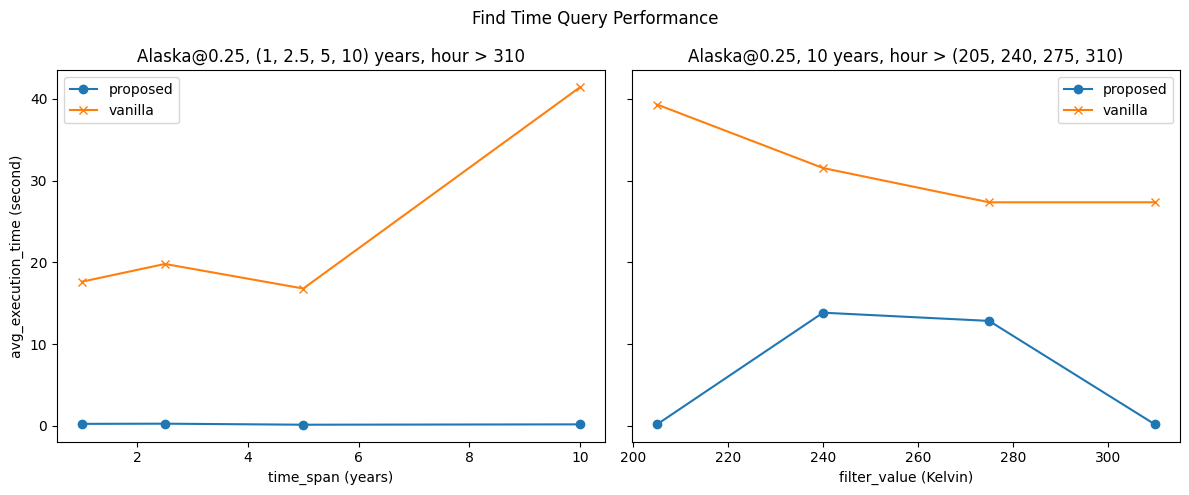

In [6]:
import matplotlib.pyplot as plt

# subplot (1, 2)
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# axs[0]: changing_time
df_changing_time = df_proposed[df_proposed["category"] == "changing_time"]
axs[0].plot(df_changing_time["time_span"], df_changing_time["avg_execution_time"], label="proposed", marker="o")
df_vanilla_changing_time = df_vanilla[df_vanilla["category"] == "changing_time"]
axs[0].plot(df_vanilla_changing_time["time_span"], df_vanilla_changing_time["avg_execution_time"], label="vanilla", marker="x")
axs[0].set_title("Alaska@0.25, (1, 2.5, 5, 10) years, hour > 310")
axs[0].set_xlabel("time_span (years)")
axs[0].set_ylabel("avg_execution_time (second)")
axs[0].legend()

# axs[1]: changing_value
df_changing_value = df_proposed[df_proposed["category"] == "changing_value"]
axs[1].plot(df_changing_value["filter_value"], df_changing_value["avg_execution_time"], label="proposed", marker="o")
df_vanilla_changing_value = df_vanilla[df_vanilla["category"] == "changing_value"]
axs[1].plot(df_vanilla_changing_value["filter_value"], df_vanilla_changing_value["avg_execution_time"], label="vanilla", marker="x")
axs[1].set_title("Alaska@0.25, 10 years, hour > (205, 240, 275, 310)")
axs[1].set_xlabel("filter_value (Kelvin)")
axs[1].legend()


# add fig title
fig.suptitle("Find Time Query Performance")
fig.tight_layout()
plt.show()